# Basic classification - Fashion MNIST

### Udacity - Intro to TensorFlow for Deep Learning

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


### Load data

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('train set :', num_train_examples)
print('test set  :', num_test_examples)

train set : 60000
test set  : 10000


In [3]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [4]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

### Explore the processed data

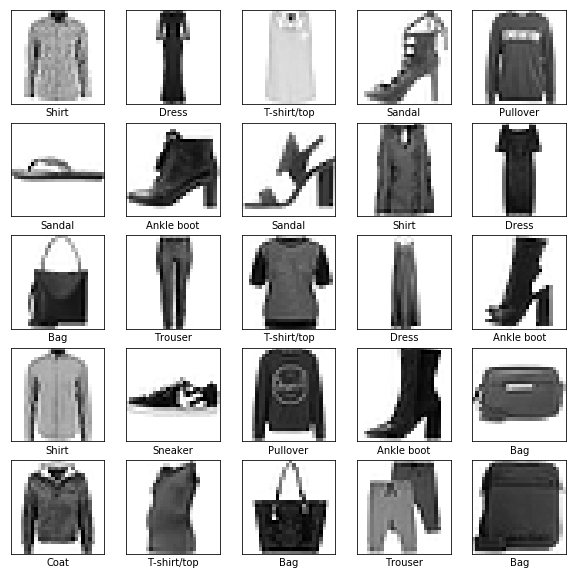

In [5]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

### Build the model & training

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [9]:
model.fit_generator(train_dataset, 
                    epochs=10, 
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    verbose=2,
                   )

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1875/1875 - 15s - loss: 0.3923 - acc: 0.8571
Epoch 2/10
1875/1875 - 10s - loss: 0.2499 - acc: 0.9108
Epoch 3/10
1875/1875 - 10s - loss: 0.2056 - acc: 0.9255
Epoch 4/10
1875/1875 - 10s - loss: 0.1764 - acc: 0.9349
Epoch 5/10
1875/1875 - 10s - loss: 0.1485 - acc: 0.9455
Epoch 6/10
1875/1875 - 10s - loss: 0.1246 - acc: 0.9543
Epoch 7/10
1875/1875 - 11s - loss: 0.1072 - acc: 0.9603
Epoch 8/10
1875/1875 - 10s - loss: 0.0868 - acc: 0.9671
Epoch 9/10
1875/1875 - 10s - loss: 0.0753 - acc: 0.9722
Epoch 10/10
1875/1875 - 10s - loss: 0.0627 - acc: 0.9768


In [10]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - ETA: 33s - loss: 0.4171 - acc: 0.90 - ETA: 3s - loss: 0.2805 - acc: 0.9330 - ETA: 2s - loss: 0.3530 - acc: 0.924 - ETA: 1s - loss: 0.3271 - acc: 0.923 - ETA: 1s - loss: 0.3379 - acc: 0.922 - ETA: 1s - loss: 0.3295 - acc: 0.923 - ETA: 1s - loss: 0.3464 - acc: 0.922 - ETA: 0s - loss: 0.3439 - acc: 0.923 - ETA: 0s - loss: 0.3285 - acc: 0.924 - ETA: 0s - loss: 0.3382 - acc: 0.922 - ETA: 0s - loss: 0.3288 - acc: 0.925 - ETA: 0s - loss: 0.3312 - acc: 0.924 - ETA: 0s - loss: 0.3347 - acc: 0.924 - ETA: 0s - loss: 0.3299 - acc: 0.924 - ETA: 0s - loss: 0.3308 - acc: 0.923 - ETA: 0s - loss: 0.3345 - acc: 0.921 - ETA: 0s - loss: 0.3369 - acc: 0.921 - ETA: 0s - loss: 0.3398 - acc: 0.921 - ETA: 0s - loss: 0.3439 - acc: 0.922 - ETA: 0s - loss: 0.3490 - acc: 0.921 - ETA: 0s - loss: 0.3477 - acc: 0.921 - 1s 4ms/step - loss: 0.3462 - acc: 0.9218


In [11]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.9218


### Make predictions and explore

In [12]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

print(predictions.shape)

(32, 10)


In [13]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')    

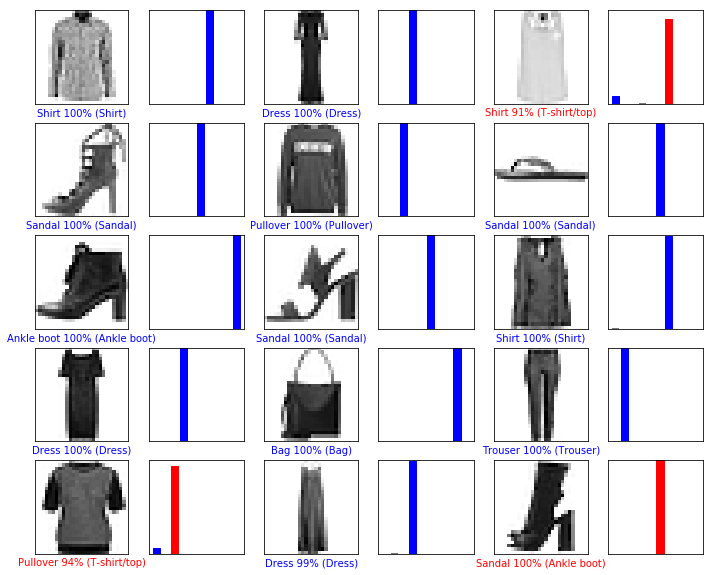

In [14]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)